In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG, display


### Import The Dataset
Import the dataset, remove the index column since pandas adds it automatically and adjust the name of the columns removing empty spaces at the beginning or at the end.

In [2]:
df = pd.read_csv('./ProjectPrompt/ddos_dataset.csv',low_memory=False)
df.drop(df.columns[0],axis=1,inplace=True) #in the csv we have also a column that is the index of the entries. We don't need that with pandas
df.columns = df.columns.str.strip()
columns = df.columns[:-1]
df.groupby("label").size()

label
benign          5658
ddos_dns        5369
ddos_ldap       5928
ddos_mssql      5911
ddos_netbios    5830
ddos_ntp         986
ddos_snmp       5984
ddos_ssdp       5970
ddos_syn        5480
ddos_tftp       5261
ddos_udp        5876
ddos_udp_lag    5986
dtype: int64

In [22]:
print("Number of data points: ",len(df))
ips = set(np.hstack((df["Source IP"].unique(),df["Destination IP"].unique())))
print("Number of ip addresses: ", len(ips))
print("Number of features: ",len(df.columns[:-1]))
print("Number of labels: ",len(df["label"].unique()))
print(len(df["Source IP"].unique()))
print(len(df["Destination IP"].unique()))

Number of data points:  64239
Number of ip addresses:  257
Number of features:  86
Number of labels:  12
216
245


### ECDF
Plot the ecdf of the source and destination ports distribution separating malicious and benign traffic

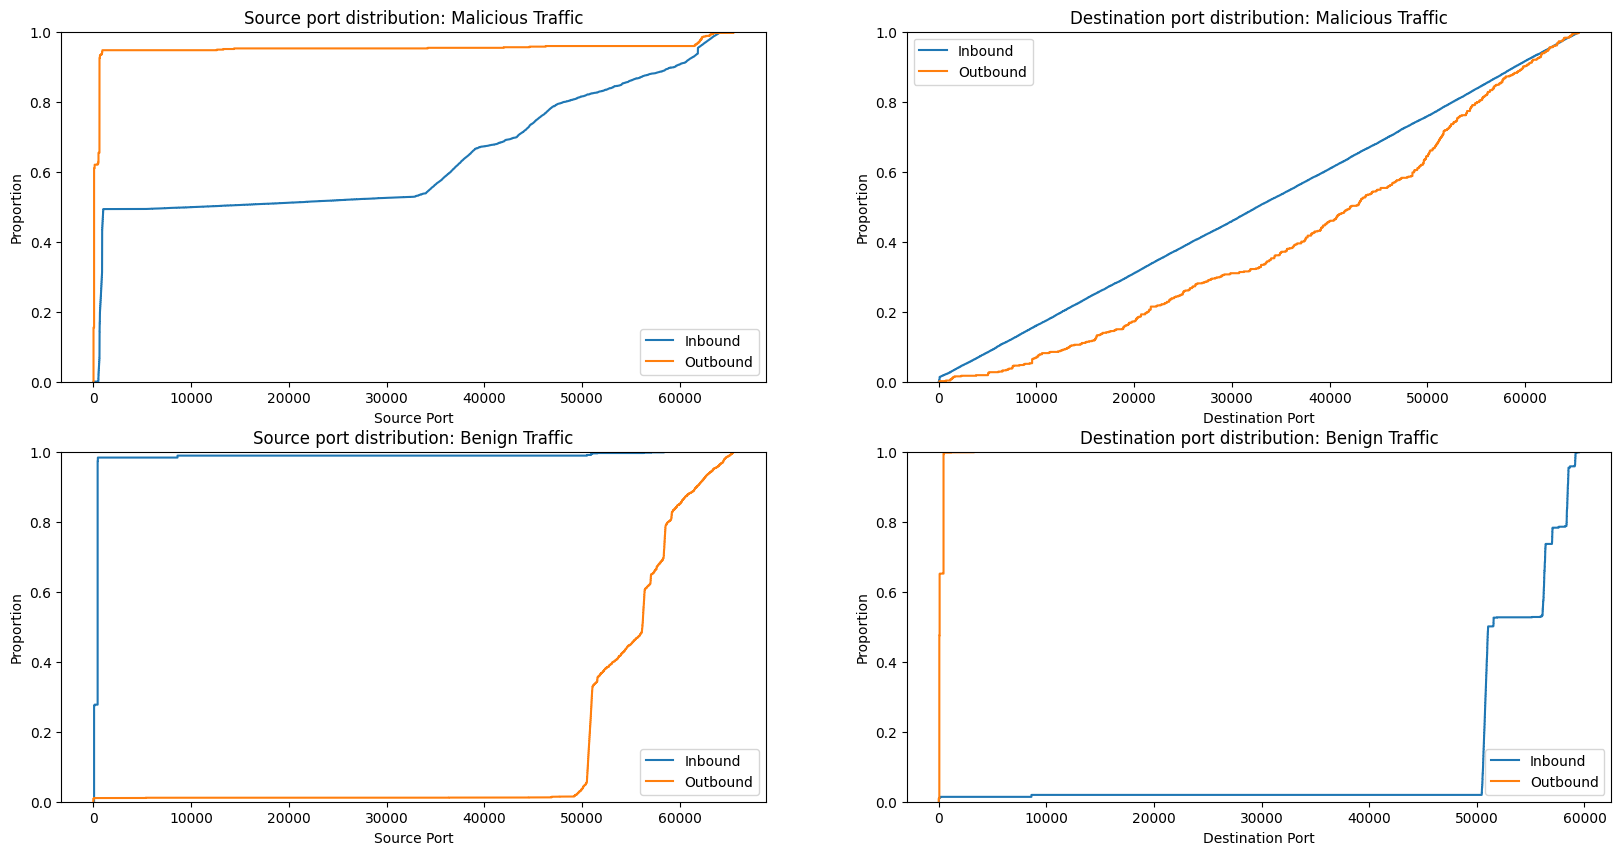

In [5]:


fig,ax = plt.subplots(2,2,figsize=(20,10))

#Inbound == 0 , the flow is generated from the device (ip source)

df2 = df[(df['label'] != 'benign')& (df['Inbound'] == 1 )].copy()
sns.ecdfplot(
    data = df2,
    x = 'Source Port',
    label='Inbound',
    ax=ax[0,0]
)
df2 = df[(df['label'] != 'benign')& (df['Inbound'] == 0 )].copy()
sns.ecdfplot(
    data = df2,
    x = 'Source Port',
    label='Outbound',
    ax=ax[0,0]
)

df2 = df[(df['label'] == 'benign')& (df['Inbound'] == 1 )].copy()
sns.ecdfplot(
    data = df2,
    x = 'Source Port',
    label='Inbound',
    ax=ax[1,0]
)
df2 = df[(df['label'] == 'benign')& (df['Inbound'] == 0 )].copy()
sns.ecdfplot(
    data = df2,
    x = 'Source Port',
    label='Outbound',
    ax=ax[1,0]
)

df2 = df[(df['label'] != 'benign') & (df['Inbound'] == 1 )].copy()
sns.ecdfplot(
    data = df2,
    x = 'Destination Port',
    label='Inbound',
    ax=ax[0,1]
)

df2 = df[(df['label'] != 'benign') & (df['Inbound'] == 0 )].copy()
sns.ecdfplot(
    data = df2,
    x = 'Destination Port',
    label='Outbound',
    ax=ax[0,1]
)

df2 = df[(df['label'] == 'benign') & (df['Inbound'] == 1 )].copy()
sns.ecdfplot(
    data = df2,
    x = 'Destination Port',
    label='Inbound',
    ax=ax[1,1]
)
df2 = df[(df['label'] == 'benign') & (df['Inbound'] == 0 )].copy()
sns.ecdfplot(
    data = df2,
    x = 'Destination Port',
    label='Outbound',
    ax=ax[1,1]
)

ax[0,0].set_title('Source port distribution: Malicious Traffic')
ax[0,1].set_title('Destination port distribution: Malicious Traffic')
ax[1,0].set_title('Source port distribution: Benign Traffic')
ax[1,1].set_title('Destination port distribution: Benign Traffic')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()


plt.yscale('linear')


### Exploring the dataset
A bunch of operations not relevant for the report.

In [4]:
# just exploring the dataset to better understand the content of some fields

print(df['Protocol'].unique())
print(df['label'].unique())

# df.query('label == "ddos_dns" & Protocol == 6')['Total Fwd Packets']

len(df.query('label != "benign"')['Source IP'].unique())

[17  0  6]
['ddos_dns' 'benign' 'ddos_ldap' 'ddos_mssql' 'ddos_netbios' 'ddos_ntp'
 'ddos_snmp' 'ddos_ssdp' 'ddos_udp' 'ddos_syn' 'ddos_tftp' 'ddos_udp_lag']


2

In [28]:

#print(df.columns)
df.set_index('Source IP')
filtered_df = df.query('`SYN Flag Count` != 0 & Inbound == 1')

# Group by Source IP and count the occurrences
grouped_df = filtered_df.groupby('Source IP').count()

# Select the desired columns
selected_cols = ['Flow ID', 'Destination IP', 'Destination Port']

# Print the filtered and grouped DataFrame
print(grouped_df[selected_cols].sort_values('Flow ID', ascending=False))

                 Flow ID  Destination IP  Destination Port
Source IP                                                 
65.55.163.78           4               4                 4
172.16.0.5             2               2                 2
52.38.138.104          2               2                 2
13.107.3.128           1               1                 1
173.194.66.108         1               1                 1
173.241.242.143        1               1                 1
209.85.232.108         1               1                 1
52.109.20.3            1               1                 1
52.109.88.34           1               1                 1
52.232.69.150          1               1                 1


In [29]:
df.iloc[:,0:20]


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std
0,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,0,42680.0,0.0,440.0,440.0,440.0,0.000000,0.0,0.0,0.0,0.0
1,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,0,880.0,0.0,440.0,440.0,440.0,0.000000,0.0,0.0,0.0,0.0
2,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,0,88000.0,0.0,440.0,440.0,440.0,0.000000,0.0,0.0,0.0,0.0
3,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,0,88000.0,0.0,440.0,440.0,440.0,0.000000,0.0,0.0,0.0,0.0
4,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,0,88000.0,0.0,440.0,440.0,440.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64234,172.16.0.5-192.168.50.1-38625-63051-17,172.16.0.5,38625,192.168.50.1,63051,17,2018-12-01 13:04:46.628249,1,2,0,750.0,0.0,375.0,375.0,375.0,0.000000,0.0,0.0,0.0,0.0
64235,172.16.0.5-192.168.50.1-58632-18963-17,172.16.0.5,58632,192.168.50.1,18963,17,2018-12-01 13:04:46.628963,212238,6,0,2088.0,0.0,393.0,321.0,348.0,35.088460,0.0,0.0,0.0,0.0
64236,172.16.0.5-192.168.50.1-46104-64704-17,172.16.0.5,46104,192.168.50.1,64704,17,2018-12-01 13:04:46.629014,1,2,0,750.0,0.0,375.0,375.0,375.0,0.000000,0.0,0.0,0.0,0.0
64237,172.16.0.5-192.168.50.1-60686-10440-17,172.16.0.5,60686,192.168.50.1,10440,17,2018-12-01 13:04:46.629016,108952,4,0,1438.0,0.0,389.0,330.0,359.5,34.063666,0.0,0.0,0.0,0.0


In [30]:
df.iloc[:,40:60]


,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size
0,-97,0,3.413690e+03,0.0,440.0,440.0,440.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,444.536082,440.0
1,-2,0,1.000000e+06,0.0,440.0,440.0,440.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,660.000000,440.0
2,-200,0,4.119549e+03,0.0,440.0,440.0,440.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,442.200000,440.0
3,-200,0,4.137617e+03,0.0,440.0,440.0,440.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,442.200000,440.0
4,-200,0,6.244926e+03,0.0,440.0,440.0,440.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,442.200000,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64234,-2,0,2.000000e+06,0.0,375.0,375.0,375.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,562.500000,375.0
64235,-6,0,2.827015e+01,0.0,321.0,393.0,344.142857,33.617597,1130.142857,0,0,0,0,0,0,0,0,0.0,401.500000,348.0
64236,-2,0,2.000000e+06,0.0,375.0,375.0,375.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,562.500000,375.0
64237,-4,0,3.671342e+01,0.0,330.0,389.0,353.600000,32.315631,1044.300000,0,0,0,0,0,0,0,0,0.0,442.000000,359.5


In [31]:
df.iloc[:,60:88]

,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,label
0,0.0,-97,0,0,0,0,0,0,97,42680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
1,0.0,-2,0,0,0,0,0,0,2,880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,ddos_dns
2,0.0,-200,0,0,0,0,0,0,200,88000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
3,0.0,-200,0,0,0,0,0,0,200,88000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
4,0.0,-200,0,0,0,0,0,0,200,88000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64234,0.0,-2,0,0,0,0,0,0,2,750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_udp_lag
64235,0.0,-6,0,0,0,0,0,0,6,2088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_udp_lag
64236,0.0,-2,0,0,0,0,0,0,2,750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_udp_lag
64237,0.0,-4,0,0,0,0,0,0,4,1438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_udp_lag


In [32]:
# IP che hanno generato traffico maligno ( monitorato)
print('Dispositivi monitorati che genera traffico maligno')
print(df.loc[(df['label']!='benign') & (df['Inbound']==0),'Source IP'].unique(),end='\n\n')

# IP che hanno generato traffico benigno ( monitorato)
print('Dispositivi monitorati che genera traffico benigno')
print(df.loc[(df['label']=='benign') & (df['Inbound']==0),'Source IP'].unique(),end='\n\n')


#Dispositivi monitorati che hanno generato traffico (unione delle prime due righe stampate)
print("Dispositivi monitorati che hanno generato traffico (unione delle prime due righe stampate)")
print(df.loc[(df['Inbound']==0),'Source IP'].unique(),end='\n\n')
#Dispositivi monitorati che hanno ricevuto traffico
print('Dispositivi monitorati che hanno ricevuto traffico')
print(df.loc[(df['Inbound']==1),'Destination IP'].unique())

Dispositivi monitorati che genera traffico maligno
['192.168.50.1']

Dispositivi monitorati che genera traffico benigno
['192.168.50.8' '192.168.50.253' '192.168.50.254' '8.6.0.1' '192.168.50.6'
 '192.168.50.7' '0.0.0.0' '192.168.50.1' '192.168.50.9']

Dispositivi monitorati che hanno generato traffico (unione delle prime due righe stampate)
['192.168.50.1' '192.168.50.8' '192.168.50.253' '192.168.50.254' '8.6.0.1'
 '192.168.50.6' '192.168.50.7' '0.0.0.0' '192.168.50.9']

Dispositivi monitorati che hanno ricevuto traffico
['192.168.50.1' '192.168.50.8' '192.168.50.7' '192.168.50.6'
 '192.168.10.50' '192.168.50.255']


In [33]:
print(df.loc[(df['Inbound']==0),'Destination IP'].unique(),end='\n\n')

['172.16.0.5' '125.56.201.115' '54.218.239.186' '224.0.0.5' '23.15.4.11'
 '172.217.0.110' '104.36.115.113' '72.21.91.29' '54.210.144.213'
 '52.203.113.92' '208.185.50.75' '96.6.27.46' '172.217.0.226'
 '35.173.44.140' '208.185.50.80' '54.222.199.48' '8.8.8.8' '8.0.6.4'
 '4.2.2.4' '74.208.236.171' '23.15.4.25' '34.216.156.21' '52.10.142.119'
 '172.217.10.2' '172.217.10.66' '172.217.12.129' '172.217.10.14'
 '172.217.7.6' '172.217.12.132' '52.89.179.237' '172.217.12.162'
 '172.217.12.134' '216.58.219.202' '23.194.142.213' '38.69.238.16'
 '172.217.10.106' '172.217.9.226' '34.204.21.102' '94.31.29.44'
 '172.217.10.35' '52.7.108.194' '172.217.0.97' '40.117.154.240'
 '172.217.0.98' '172.217.0.99' '172.217.2.98' '172.217.1.2' '172.217.1.4'
 '172.217.2.170' '172.217.0.102' '173.241.244.143' '172.217.6.194'
 '216.58.219.196' '52.36.71.24' '108.177.112.108' '52.173.24.17'
 '255.255.255.255' '172.217.10.10' '172.217.0.106' '125.56.201.105'
 '172.217.3.110' '8.43.72.98' '23.194.142.15' '40.76.207.20

In [34]:
dispositivi_monitorati = set(list(df.loc[(df['Inbound']==0),'Source IP'].unique()) + list(df.loc[(df['Inbound']==1),'Destination IP'].unique()))
print(dispositivi_monitorati)
# print(df.loc[df['Source IP'].isin(dispositivi_monitorati) & df['Destination IP'].isin(dispositivi_monitorati) ,'Flow ID'])
# print(df.loc[df['Flow ID'].startswith('192.168.10.50-192.168.50.6'),'Flow ID'])
# 192.168.10.50-192.168.50.6
# filtered_df = df[(df['column1'].isin(column1_values)) & (df['column2'].isin(column2_values))]
regex_pattern = "^(192.168.10.50-192.168.50.6)"
filtered_df = df[df['Flow ID'].str.contains(regex_pattern)]
print(filtered_df)



{'192.168.10.50', '192.168.50.8', '192.168.50.255', '0.0.0.0', '192.168.50.253', '192.168.50.1', '8.6.0.1', '192.168.50.6', '192.168.50.7', '192.168.50.254', '192.168.50.9'}
                                     Flow ID     Source IP  Source Port  \
1474   192.168.10.50-192.168.50.6-22-57032-6  192.168.50.6        57032   
27471  192.168.10.50-192.168.50.6-21-56274-6  192.168.50.6        56274   

      Destination IP  Destination Port  Protocol                   Timestamp  \
1474   192.168.10.50                22         6  2018-12-01 10:53:33.530618   
27471  192.168.10.50                21         6  2018-12-01 09:30:22.329010   

       Flow Duration  Total Fwd Packets  Total Backward Packets  ...  \
1474         9029795                  6                       0  ...   
27471        8999249                  6                       0  ...   

       Active Std  Active Max  Active Min  Idle Mean  Idle Std   Idle Max  \
1474          0.0   3013798.0   3013798.0  6015995.0       0.0  6

/tmp/ipykernel_13149/4231836730.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = df[df['Flow ID'].str.contains(regex_pattern)]


#### Histogram
Visualize the distribution of flow durations and total packets for benign and malicious traffic

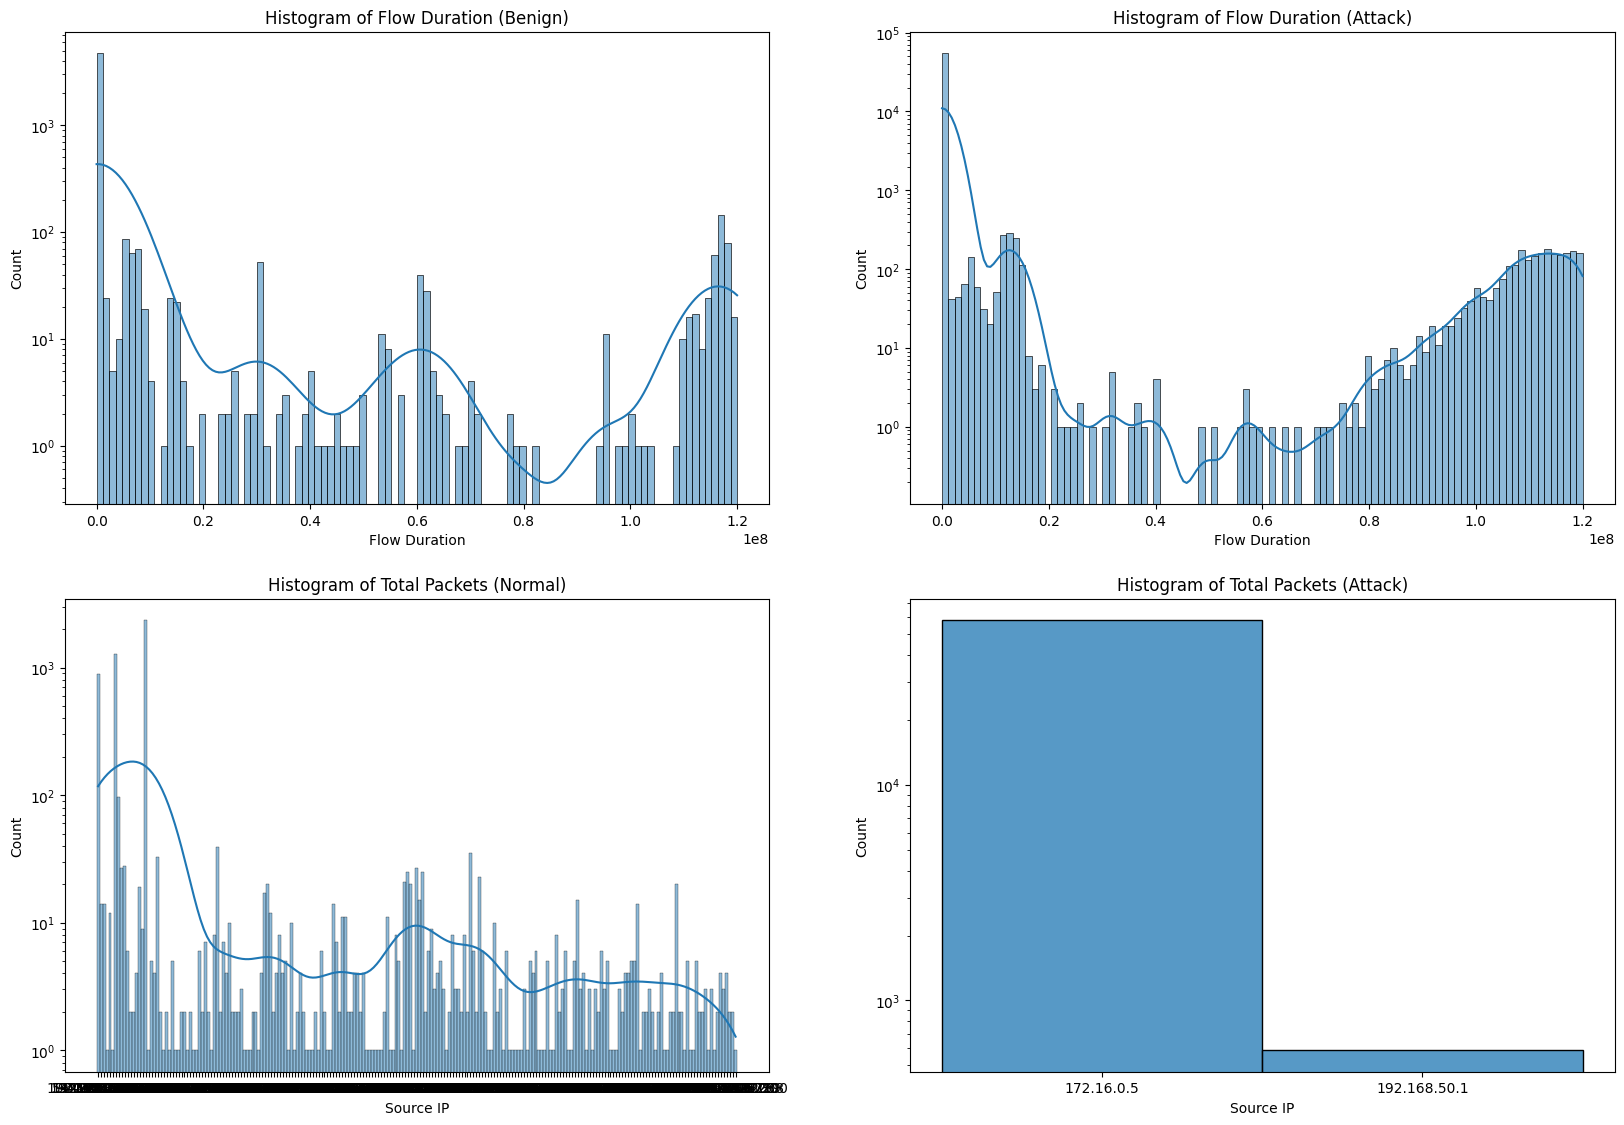

In [55]:

# Create histograms for flow duration and total packets
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

normal_data = df[df['label'] == 'benign']
attack_data = df[df['label'] != 'benign']

# Histogram for normal flow duration
sns.histplot(
    data=normal_data, x='Flow Duration', ax=axs[0, 0], bins=100, label='benign',kde=True
)
axs[0, 0].set_title('Histogram of Flow Duration (Benign)')
axs[0,0].set_yscale('log')

# Histogram for attack flow duration
sns.histplot(
    data=attack_data, x='Flow Duration', ax=axs[0, 1], bins=100, label='Attack',kde=True
)
axs[0, 1].set_title('Histogram of Flow Duration (Attack)')
axs[0,1].set_yscale('log')

# Histogram for normal total packets
sns.histplot(
    data=normal_data, x='Source IP', ax=axs[1, 0], bins=100, label='Normal',kde=True
)
axs[1, 0].set_title('Histogram of Total Packets (Normal)')
axs[1,0].set_yscale('log')

#Add the multiply for the number of packets per flow

# Histogram for attack total packets
sns.histplot(
    data=attack_data, x='Source IP', ax=axs[1, 1], bins=100, label='Attack'
)
axs[1, 1].set_title('Histogram of Total Packets (Attack)')
axs[1,1].set_yscale('log')

fig.subplots_adjust(left=0.125, right=0.9, top=0.9, bottom=0.25)

plt.show()


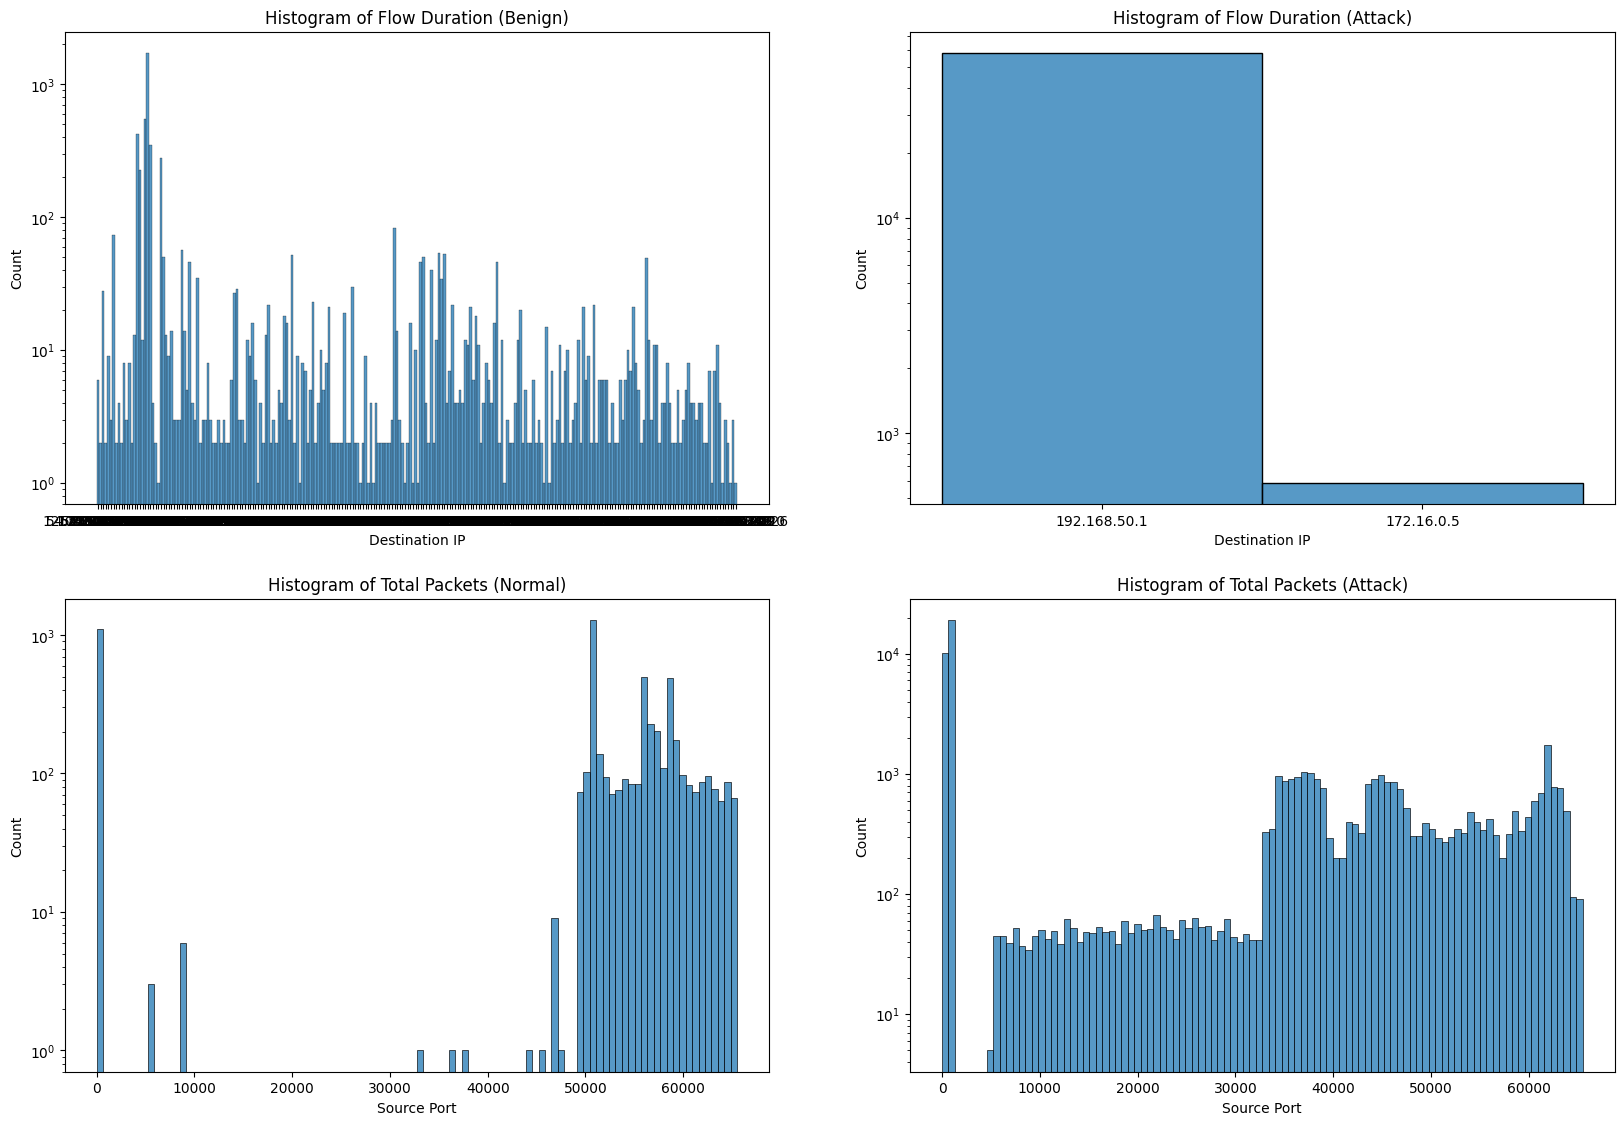

In [74]:
# Create histograms for flow duration and total packets
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

normal_data = df[df['label'] == 'benign']
attack_data = df[df['label'] != 'benign']

# Histogram for normal flow duration
sns.histplot(
    data=normal_data, x='Destination IP', ax=axs[0, 0], bins=100, label='benign'
)
axs[0, 0].set_title('Histogram of Flow Duration (Benign)')
axs[0,0].set_yscale('log')
# axs[0,0].tick_params(axis='x',rotation=90)

# Histogram for attack flow duration
sns.histplot(
    data=attack_data, x='Destination IP', ax=axs[0, 1], bins=100, label='Attack'
)
axs[0, 1].set_title('Histogram of Flow Duration (Attack)')
axs[0,1].set_yscale('log')

# Histogram for normal total packets
sns.histplot(
    data=normal_data, x='Source Port', ax=axs[1, 0], bins=100, label='Normal'
)
axs[1, 0].set_title('Histogram of Total Packets (Normal)')
axs[1,0].set_yscale('log')

# Histogram for attack total packets
sns.histplot(
    data=attack_data, x='Source Port', ax=axs[1, 1], bins=100, label='Attack'
)
axs[1, 1].set_title('Histogram of Total Packets (Attack)')
axs[1,1].set_yscale('log')

fig.subplots_adjust(left=0.125, right=0.9, top=0.9, bottom=0.25)
plt.show()


#### Flow duration per attack type

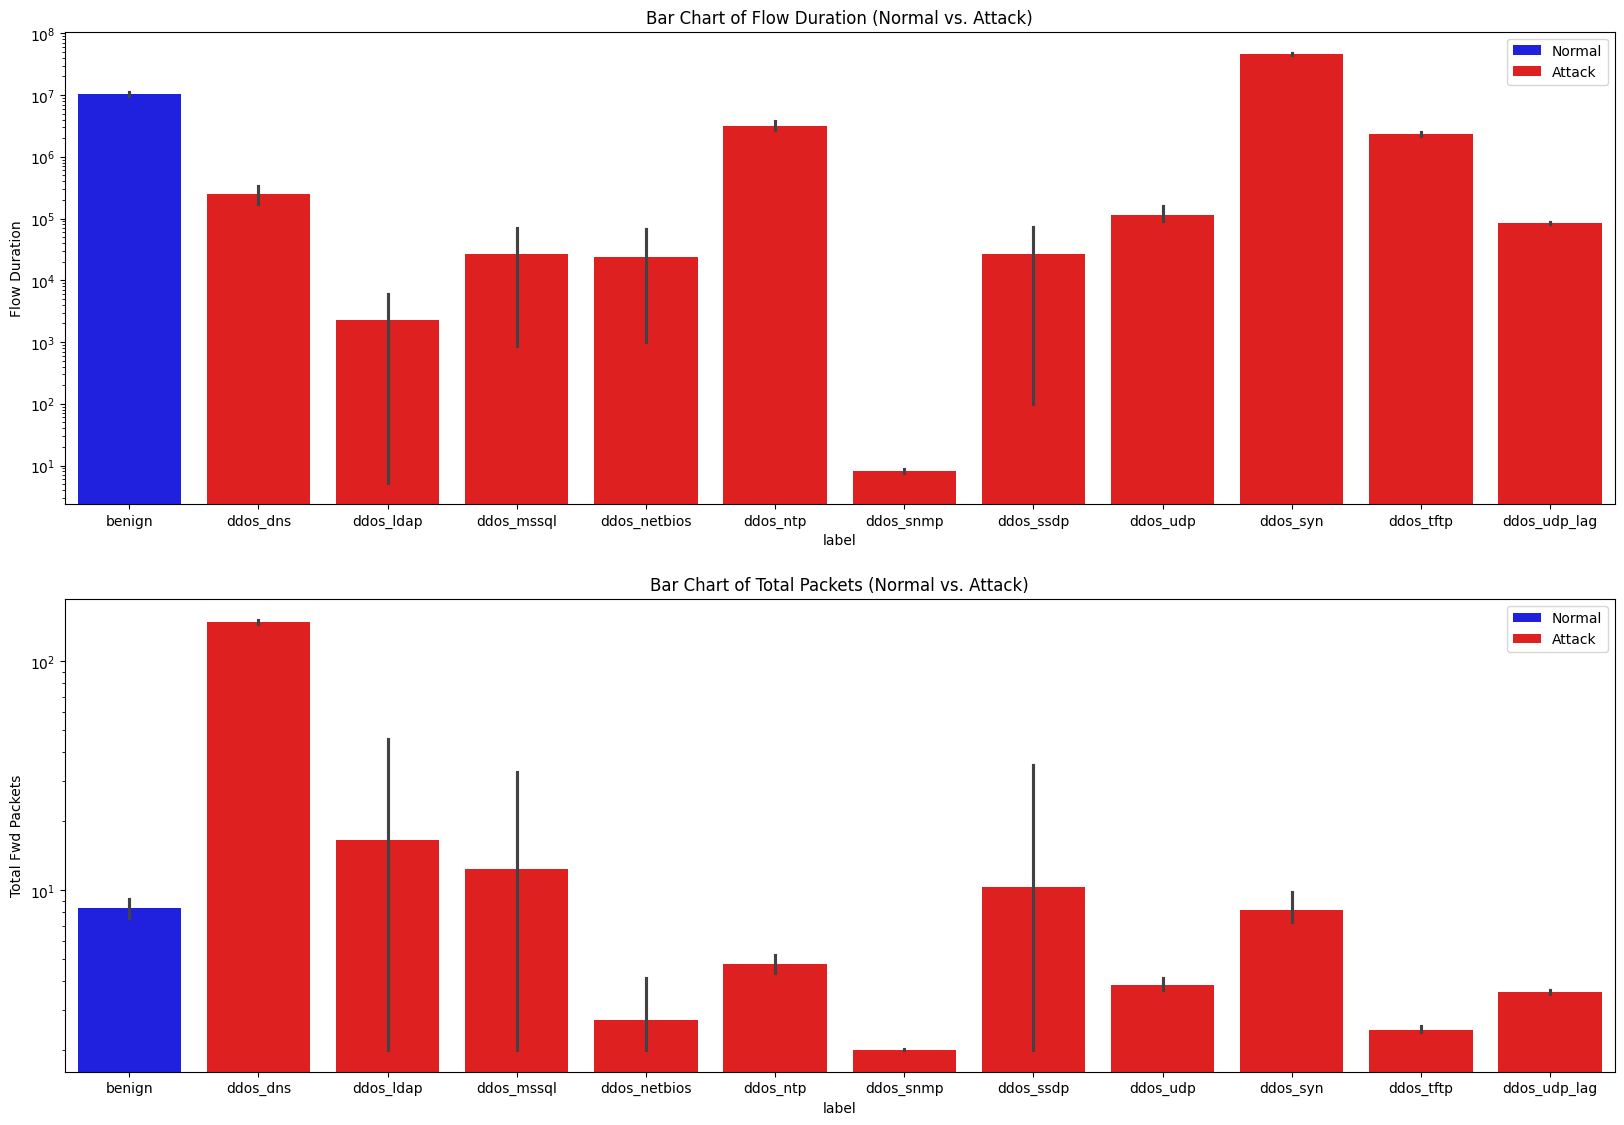

In [76]:
# Create bar charts for flow duration and total packets
fig, axs = plt.subplots(2, 1, figsize=(20, 16))

# Bar chart for normal flow duration
sns.barplot(
    x='label',
    y='Flow Duration',
    data=normal_data,
    color='blue',
    ax=axs[0],
    label='Normal',
    #errorbar=None
)
sns.barplot(
    x='label',
    y='Flow Duration',
    data=attack_data,
    color='red', 
    ax=axs[0],
    label='Attack',
    #errorbar=None
)
axs[0].set_title('Bar Chart of Flow Duration (Normal vs. Attack)')

# Bar chart for normal total packets
sns.barplot(
    x='label',
    y='Total Fwd Packets',
    data=normal_data,
    color='blue',
    ax=axs[1],
    label='Normal',
    #errorbar=None
)
sns.barplot(
    x='label', 
    y='Total Fwd Packets',
    data=attack_data,
    color='red',
    ax=axs[1],
    label='Attack',
    #errorbar=None
)
axs[1].set_title('Bar Chart of Total Packets (Normal vs. Attack)')
axs[0].set_yscale('log')
axs[1].set_yscale('log')
fig.subplots_adjust(left=0.125, right=0.9, top=0.9, bottom=0.25)
plt.show()


#### Inter-arrival time per attack type

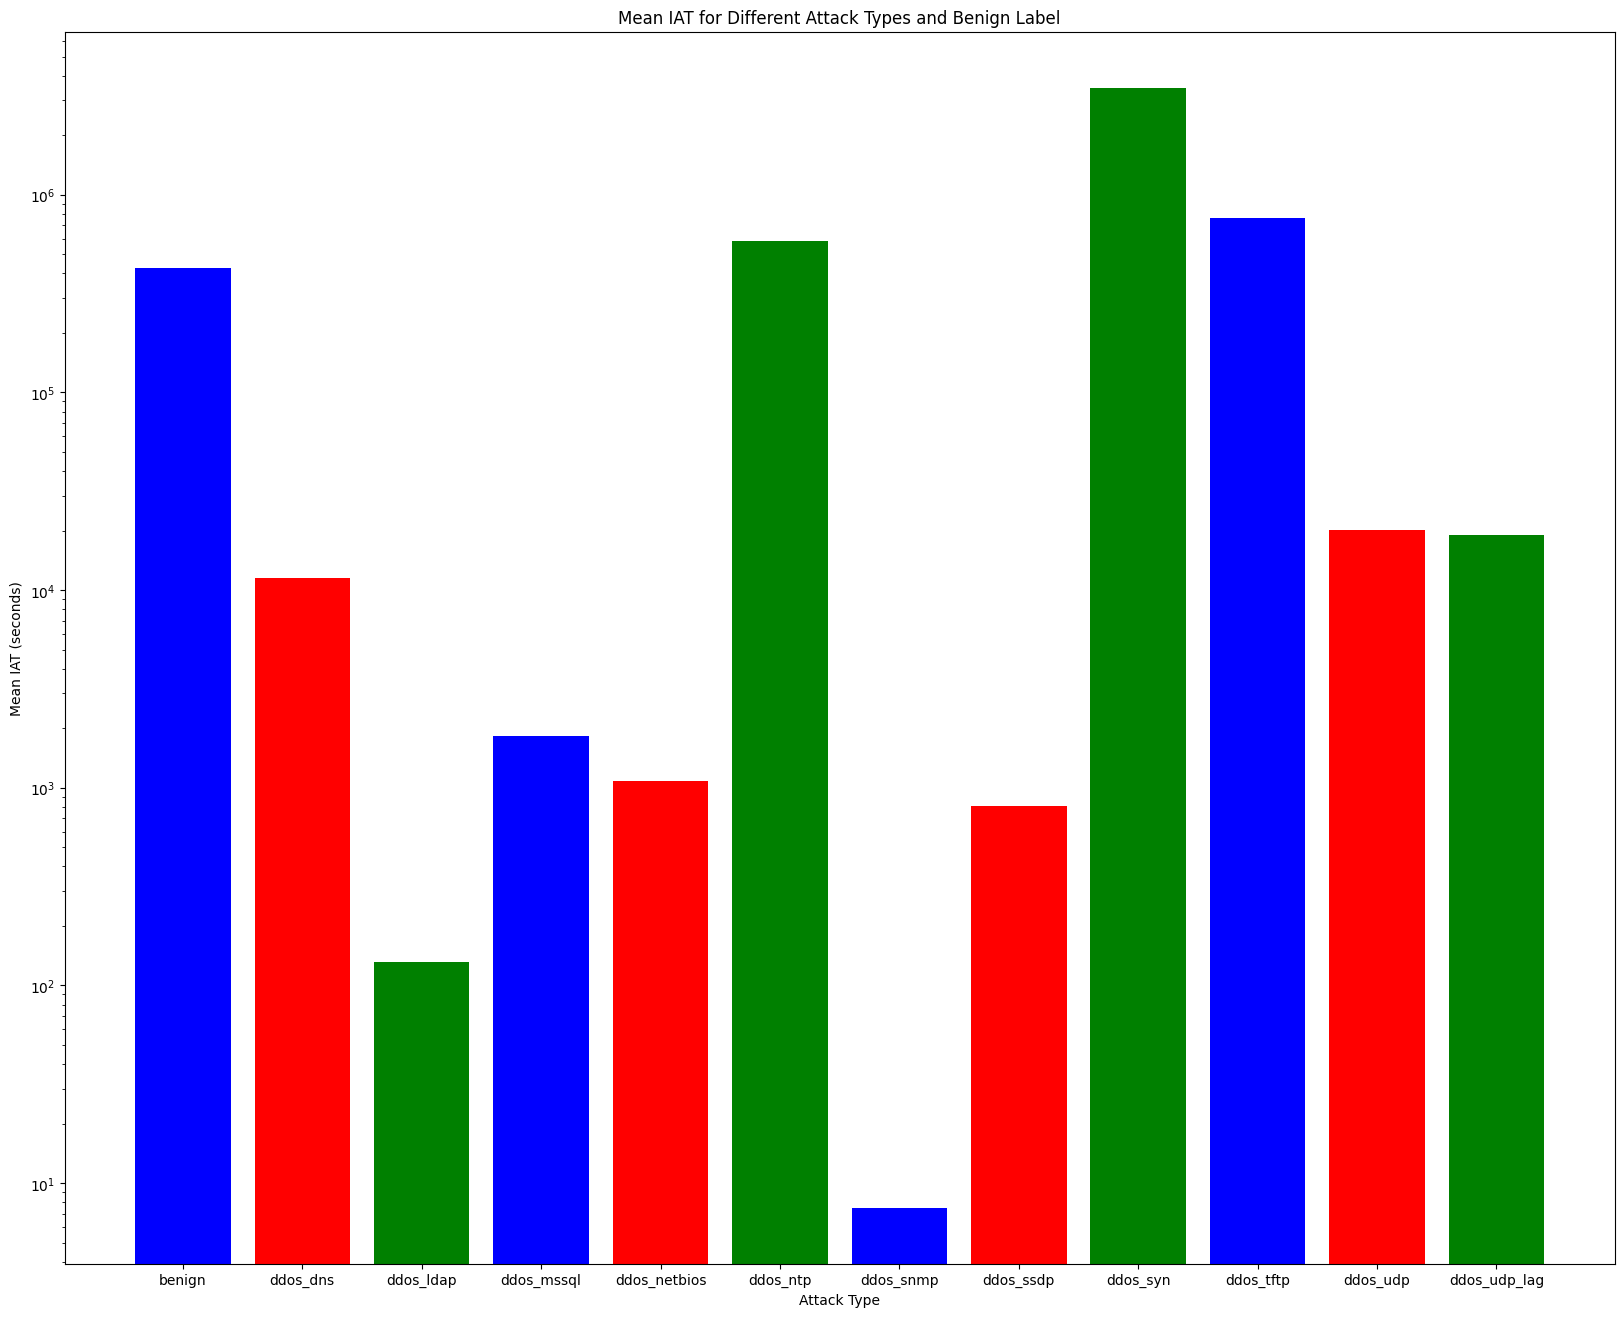

In [77]:

# Separate normal and attack traffic

# Create a single figure with two subplots
fig, axs = plt.subplots(1,1, figsize=(20, 16))

grouped_data = (
    df.groupby('label')['Fwd IAT Mean']
    .mean()
    .reset_index()
    .rename(columns={'Fwd IAT Mean': 'Mean IAT'})
)

axs.set_yscale('log')

# Create a bar chart to visualize the mean IAT for different attack types
plt.bar(grouped_data['label'], grouped_data['Mean IAT'], color=['blue', 'red', 'green'])
plt.xlabel('Attack Type')
plt.ylabel('Mean IAT (seconds)')
plt.title('Mean IAT for Different Attack Types and Benign Label')
plt.show()




#### Tcp flags count for each type of attack.
Thanks to this analysis we were able to detect an error in the dataset where the ddos_syn attack has no syn flags at all

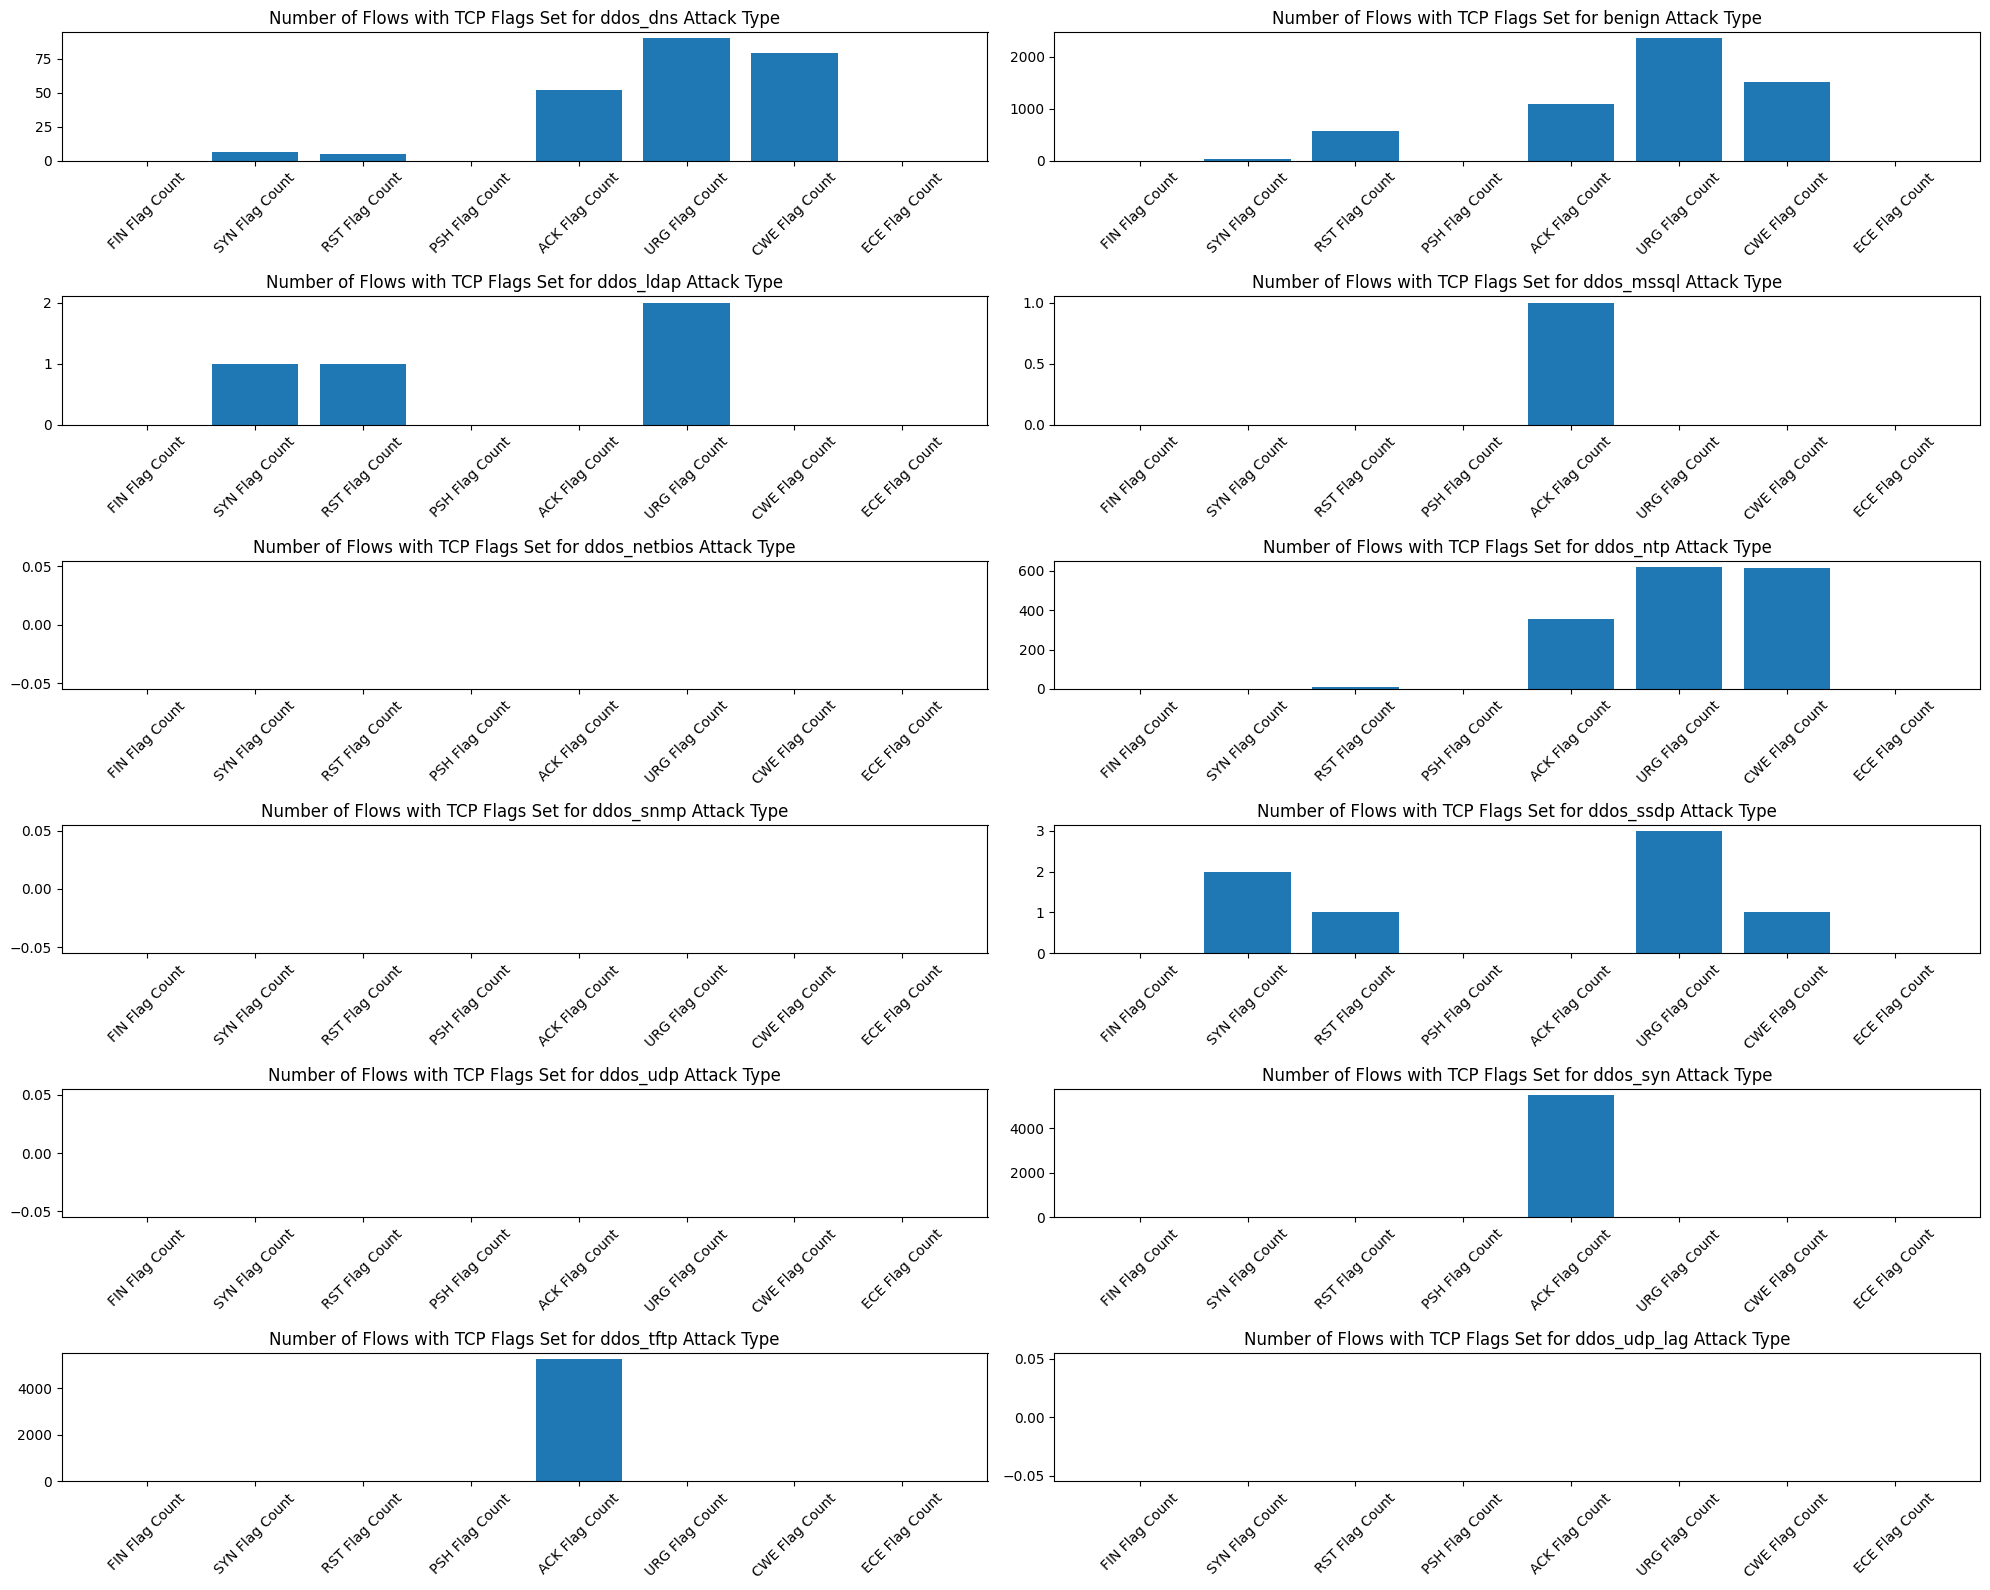

In [11]:

#fig, axs = plt.subplots(6,2, figsize=(20, 16))

# Get the list of attack types

attack_types = df['label'].unique()

# Get the list of TCP flags
#tcp_flags = ['FIN Flag', 'SYN Flag', 'RST Flag', 'PSH Flag', 'ACK Flag', 'URG Flag', 'CWE Flag', 'ECE Flag']
tcp_flags = ['FIN Flag Count'	,'SYN Flag Count'	,'RST Flag Count'	,'PSH Flag Count'	,'ACK Flag Count'	,'URG Flag Count'	,'CWE Flag Count'	,'ECE Flag Count']

# Create a dataframe to store the flag usage information
flag_usage_df = pd.DataFrame(columns=attack_types, index=tcp_flags)

# Iterate through each attack type and collect the flag usage information
# Iterate through each attack type
fig, axes = plt.subplots(6, 2, figsize=(20, 16))
for i, attack_type in enumerate(attack_types):
    # Filter the data for the current attack type
    data_filtered = df[df['label'] == attack_type]

    # Count the number of flows with each flag set
    flag_counts = data_filtered[tcp_flags].sum()

    # Create the bar chart
    ax = axes.flatten()[i]
    ax.bar(tcp_flags, flag_counts)
    ax.set_title(f'Number of Flows with TCP Flags Set for {attack_type} Attack Type')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()

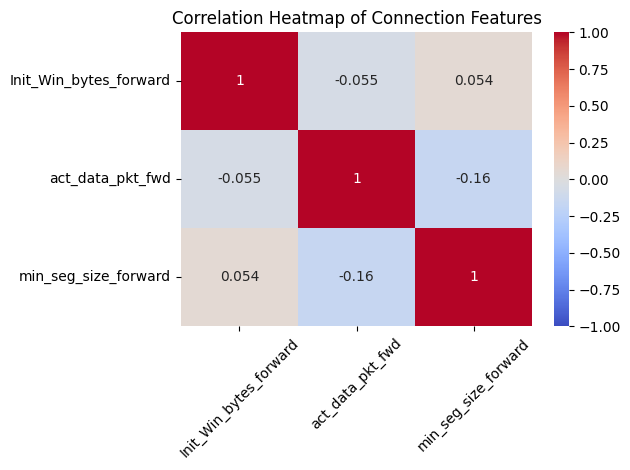

In [40]:
connection_features = ['Init_Win_bytes_forward', 'act_data_pkt_fwd', 'min_seg_size_forward']

# Calculate the correlation matrix
correlation_matrix = df[connection_features].corr()

# Create the heatmap
fig, ax = plt.subplots()
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Connection Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Distribution of packets length and inter-arrival times for different attack types

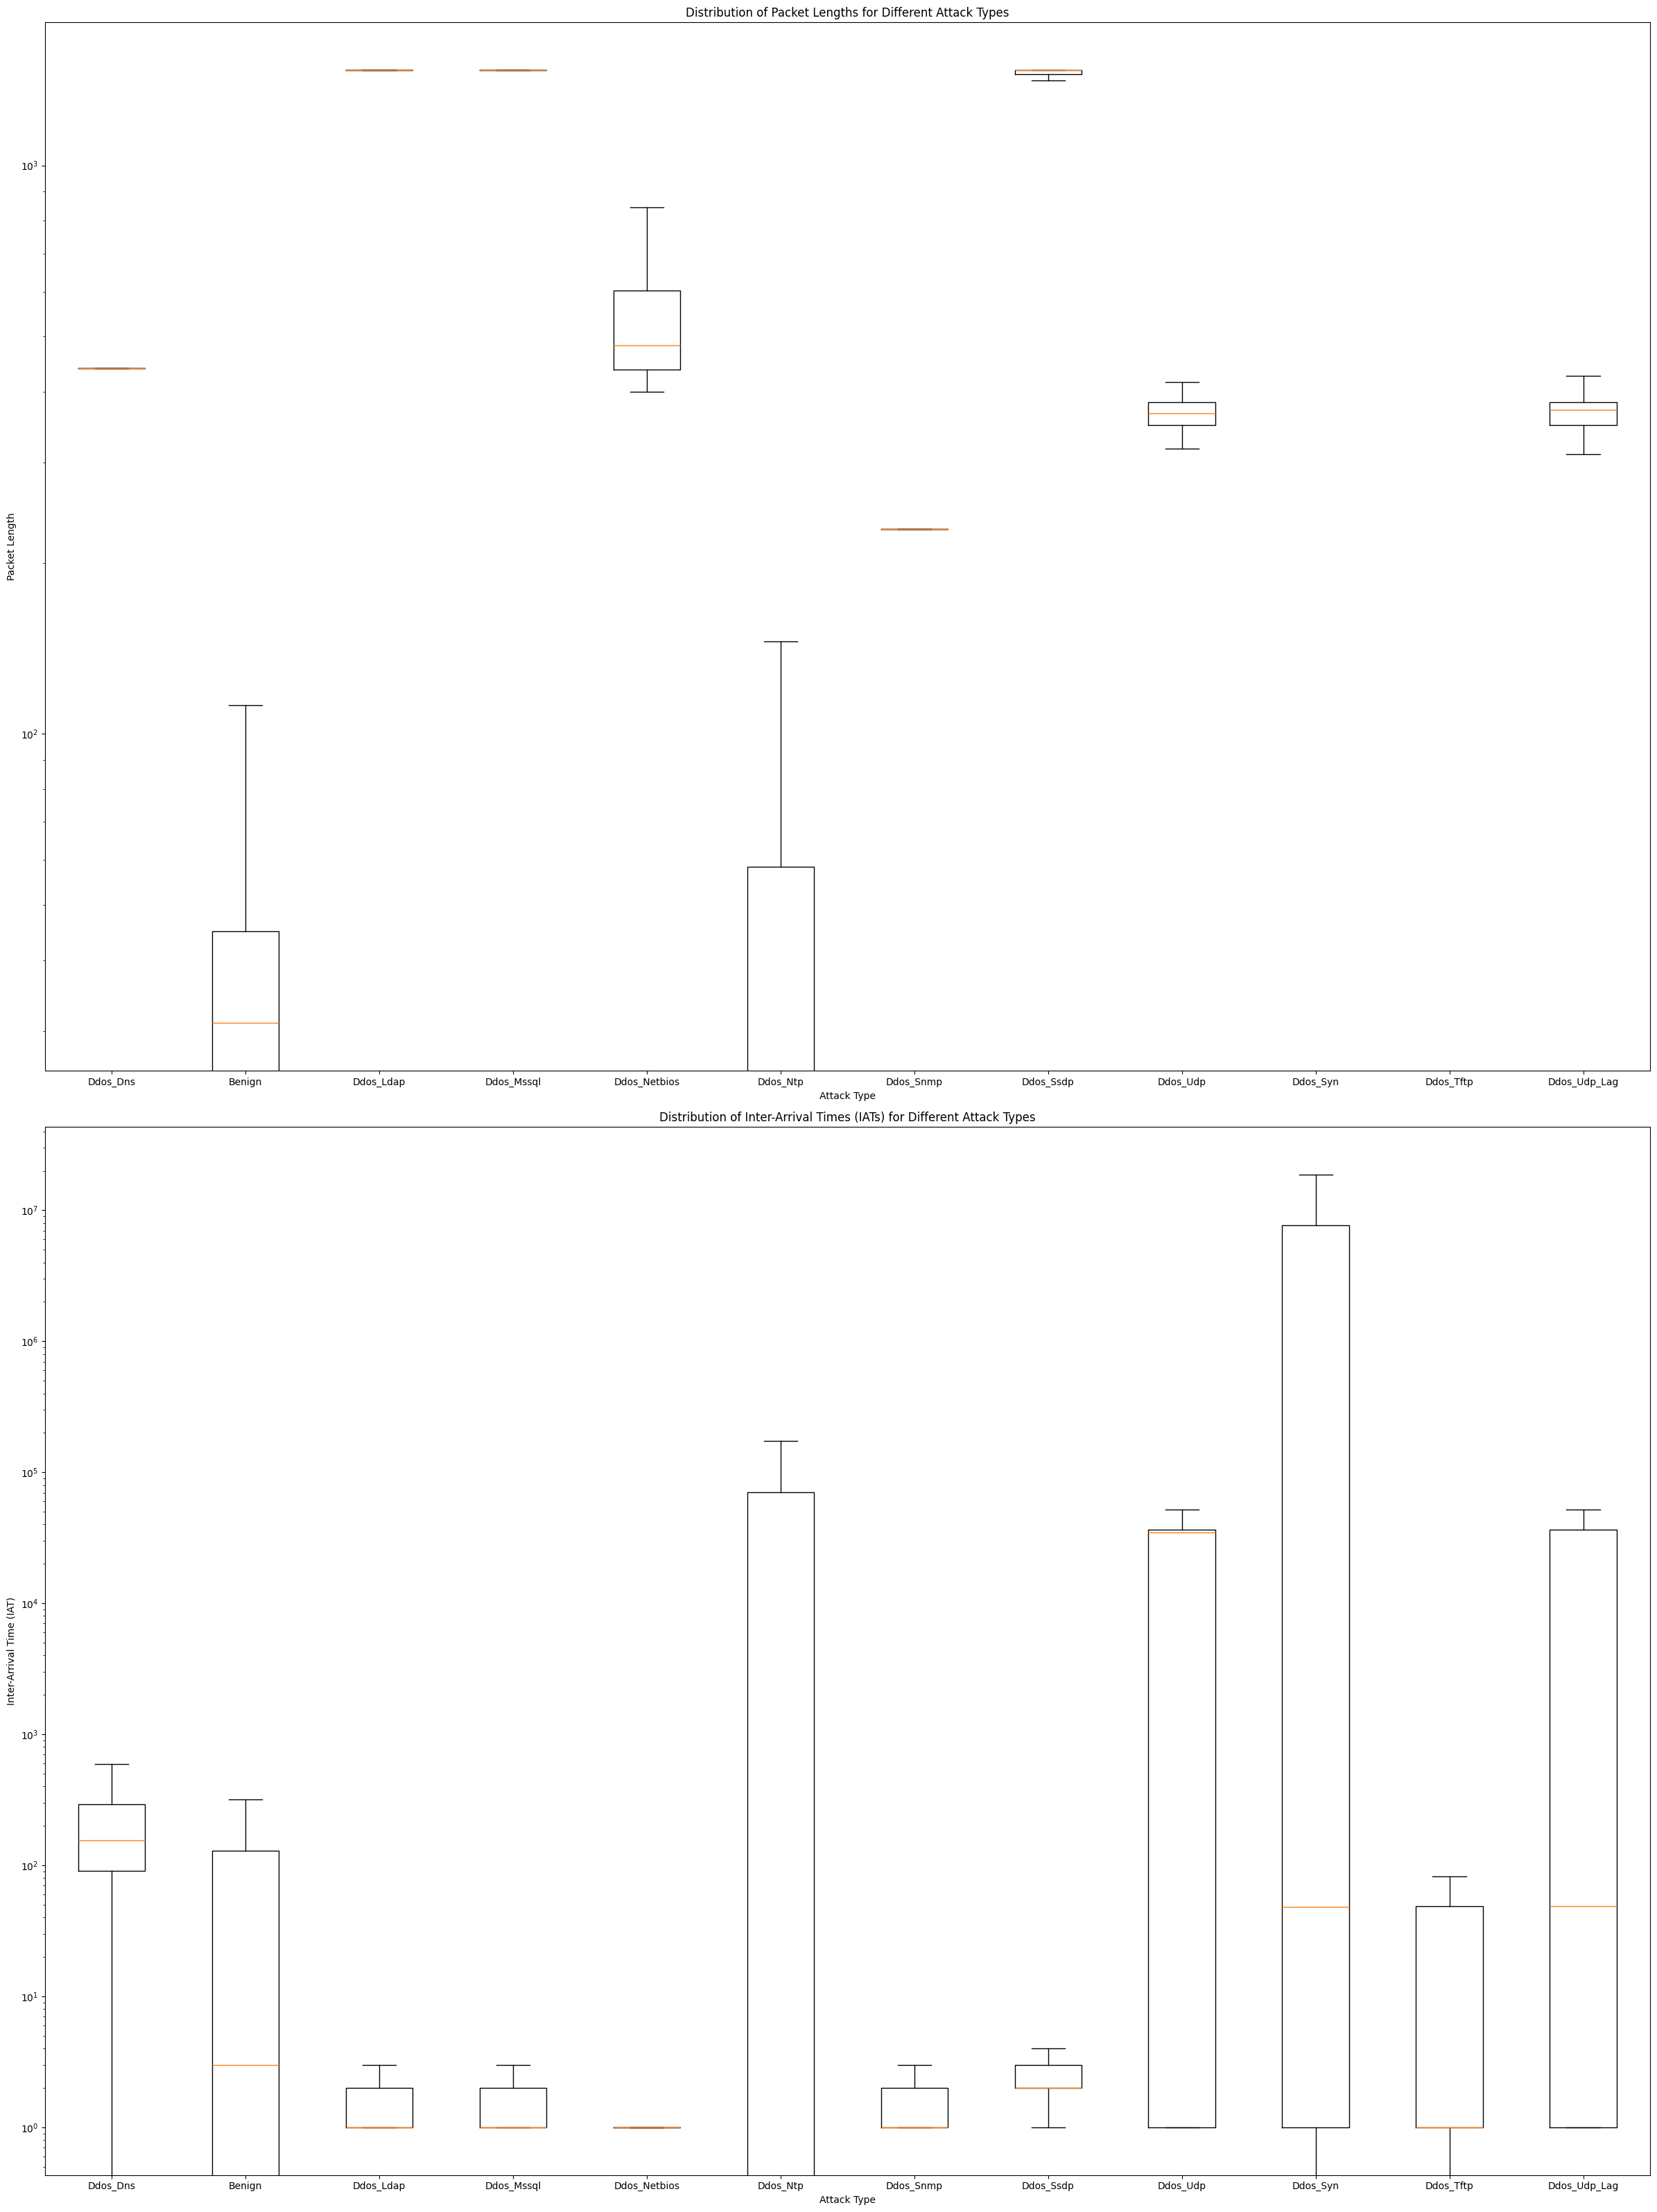

In [8]:
attack_types = df['label'].unique()

# Extract the packet length and IAT data for each attack type
packet_lengths = []
iats = []
for attack_type in attack_types:
    filtered_data = df[df['label'] == attack_type]
    packet_lengths.append(filtered_data['Fwd Packet Length Mean'].to_numpy())
    iats.append(filtered_data['Fwd IAT Mean'].to_numpy())

# Create the box plots for packet lengths
fig, axs = plt.subplots(2, 1, figsize=(24, 32))
attack_names = [attack_type.title() for attack_type in attack_types]
axs[0].boxplot(packet_lengths, labels=attack_names,showfliers=False)
axs[0].set_title('Distribution of Packets Length for Different Attack Types')
axs[0].set_xlabel('Attack Type')
axs[0].set_ylabel('Packet Length')
axs[0].set_yscale('log')
# Create the box plots for IATs
axs[1].boxplot(iats,labels=attack_names,showfliers=False)
axs[1].set_title('Distribution of Inter-Arrival Times (IATs) for Different Attack Types')
axs[1].set_xlabel('Attack Type')
axs[1].set_ylabel('Inter-Arrival Time (IAT)')
axs[1].set_yscale('log')
# Display the box plots
plt.tight_layout()

plt.show()